# Importing Libraries

In [1]:
#required for tesseract functionalities
!pip install pytesseract
!pip install tesseract
!apt-get install poppler-utils
!apt install tesseract-ocr
!apt install libtesseract-dev
!sudo apt install tesseract-ocr
import pytesseract
#required for image processing
!pip install Pillow
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import glob #required for file handling
import re #required for regex operations
from difflib import SequenceMatcher #required for comparing(accuracy)
import numpy as np #numpy array

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=22e0874c51129fe80e112e1391c3b8f9c9cb9bf6acbca652ba4e4a9a92d5257e
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
     |████████████████████████████████| 45.6MB 84kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp37-none-any.whl size=45562571 sha256=5a2bd406397b6ba994998291a75063795d71f766a3f18dc728cceddf7285de55
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not 

#Adding custom options

In [2]:
custom_config = r'--oem 2 --psm 1' #setting for tesseract+lstm model(oem) and automatic page segmentation with osd and ocr(psm)
pytesseract.pytesseract.tesseract_cmd = r"/usr/bin/tesseract" #tesseract path

**TYPE 1**

After twiddling around with various techniques and parameters, it was decided that applying pre-processing techniques only degrades the accuracy levels so only segmentation is applied.

Note: Hand-written text so accuracies will be extremely low understandably.

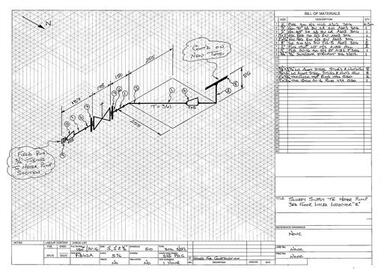

In [3]:

avg1=0 #initialising variable to store and calculate average accuracy

#Loop for iterating through image files in the path
for filepath in glob.iglob("/content/gdrive/MyDrive/CA-3/IsometricFiles/type1/*.jpg"): 

    imagename=filepath.rsplit("/",1)[1] #obtaining the file name with extension from the filepath by Right-Split
    imgnoext=filepath.rsplit("c",1)[1] #obtaining the file number and extension from the filepath by Right-Split
    imgno=imgnoext.rsplit("-",1)[0] #obtaining the file number  from the file 'file number and extension' by Right-Split
    
    print("Scanned image-",filepath) #printing the image details being processed for clarity

 #Reading the image file from the path
    img = cv2.imread(filepath)

#Pre-processing
    img = img[220:img.shape[0]-4000,5860:img.shape[1]-270] #extracting the ROI(region of interest) - SEGMENTATION

#Storing Results
    cv2.imwrite('/content/gdrive/My Drive/CA-3/Processed/type1/'+imagename, img) #saving the processed image to the path
 
    text = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA-3/Processed/type1/"+imagename), lang='eng')))) #reading and converting the processed image into a 
                                                                                                                                    #string  -TESSERACT

    with open("/content/gdrive/My Drive/CA-3/Processed/type1/RedactedIsometric"+imgno+"-1.txt", "w") as writefile: #opening a text file in a path in write mode (supports replace)
     writefile.write(re.sub(r"[$&+,:;=?@#\"~%!\]]",'',text) + "\n") #writing the string into a text file after using regex to remove noise characters -REGEX

#Evaluating Accuracy
    text1 = open("/content/gdrive/MyDrive/CA-3/IsometricFiles/type1/GroundTruth-BOM"+imgno+".txt").read() #reading truth file
    text2 = open("/content/gdrive/My Drive/CA-3/Processed/type1/RedactedIsometric"+imgno+"-1.txt").read() #reading saved text
    m = SequenceMatcher(None, text1, text2) #comparing both file -SEQUENCE MATCHING

#Printing Results
    print("Accuracy - ")
    print(m.ratio()) #returns percentage of similarity
    avg1=avg1+m.ratio()*100 #calculating average accuracy of the subset
    print("\n"+"**********************************"+"\n")
avg1=avg1/4
print("Average=",avg1) #printing average accuracy of the subset

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type1/RedactedIsometric1-1.jpg
Accuracy - 
0.09876543209876543

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type1/RedactedIsometric2-1.jpg
Accuracy - 
0.29914529914529914

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type1/RedactedIsometric3-1.jpg
Accuracy - 
0.13161659513590845

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type1/RedactedIsometric4-1.jpg
Accuracy - 
0.16012558869701726

**********************************

Average= 17.241322876924755


**TYPE 2**

After twiddling around with various techniques and parameters, it was decided that applying pre-processing techniques only degrades the accuracy levels so only segmentation is applied.

Note: Printed text hence better accuracies.

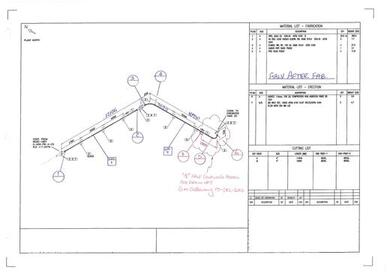

In [4]:

avg2=0 #initialising variable to store and calculate average accuracy

#Loop for iterating through image files in the path
for filepath in glob.iglob("/content/gdrive/MyDrive/CA-3/IsometricFiles/type2/*.jpg"):

    imagename=filepath.rsplit("/",1)[1] #obtaining the file name with extension from the filepath by Right-Split
    imgnoext=filepath.rsplit("c",1)[1] #obtaining the file number and extension from the filepath by Right-Split
    imgno=imgnoext.rsplit("-",1)[0] #obtaining the file number  from the 'file number and extension' by Right-Split

    print("Scanned image-",filepath) #printing the image details being processed for clarity

#Reading the image file from  path   
    img = cv2.imread(filepath)

#Pre-processing
    img = img[370:img.shape[0]-2980,5300:img.shape[1]-400]  #extracting the ROI(region of interest) - SEGMENTATION

#Storing Results
    cv2.imwrite('/content/gdrive/My Drive/CA-3/Processed/type2/'+imagename, img) #saving the processed image to path

    text = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA-3/Processed/type2/"+imagename), lang='eng'))))#reading and converting the processed image into a 
                                                                                                                                   #string -TESSERACT
   
    with open("/content/gdrive/My Drive/CA-3/Processed/type2/RedactedIsometric"+imgno+"-1.txt", "w") as writefile: #opening a text file in a path in write mode (supports replace)
     writefile.write(re.sub(r"[$&+,:;=?@#\"~%!\]]",'',text) + "\n") #writing the string into a text file after using regex to remove noise characters -REGEX

#Evaluating Accuracy
    text1 = open("/content/gdrive/MyDrive/CA-3/IsometricFiles/type2/GroundTruth-BOM"+imgno+".txt").read() #reading truth file
    text2 = open("/content/gdrive/My Drive/CA-3/Processed/type2/RedactedIsometric"+imgno+"-1.txt").read() #reading saved text
    m = SequenceMatcher(None, text1, text2) #comparing both file

#Printing Results
    print("Accuracy - ")
    print(m.ratio()) #returns percentage of similarity
    avg2=avg2+m.ratio()*100 #calculating average accuracy of the subset
    print("\n"+"**********************************"+"\n")
avg2=avg2/24
print("Average=",avg2) #printing average accuracy of the subset

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type2/RedactedIsometric16-1.jpg
Accuracy - 
0.34662327095199347

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type2/RedactedIsometric15-1.jpg
Accuracy - 
0.3548387096774194

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type2/RedactedIsometric19-1.jpg
Accuracy - 
0.34673191191890945

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type2/RedactedIsometric20-1.jpg
Accuracy - 
0.04107424960505529

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type2/RedactedIsometric21-1.jpg
Accuracy - 
0.3526416295353278

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type2/RedactedIsometric22-1.jpg
Accuracy - 
0.29213483146067415

**********************************

Scanned image- /content/gdrive/MyDrive/CA-

**TYPE 3**

After twiddling around with various techniques and parameters, it was observed that converting the images to grayscale and applying Gaussian Blurring improved the average accuracy by a small margin.

Note: Contains colour. Lower sections of the bills avoided as the model picks up characters which are missing in the truth files bringing down the accuracy.

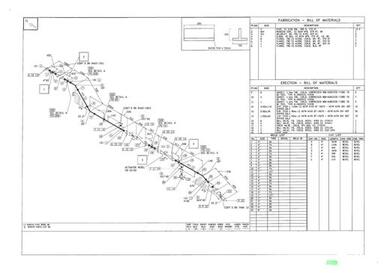

In [5]:

avg3=0 #initialising variable to store and calculate average accuracy

#Loop for iterating through image files in the path
for filepath in glob.iglob("/content/gdrive/MyDrive/CA-3/IsometricFiles/type3/*.jpg"):

    imagename=filepath.rsplit("/",1)[1] #obtaining the file name with extension from the filepath by Right-Split
    imgnoext=filepath.rsplit("c",1)[1] #obtaining the file number and extension from the filepath by Right-Split
    imgno=imgnoext.rsplit("-",1)[0] #obtaining the file number  from the 'file number and extension' by Right-Split

    print("Scanned image-",filepath) #printing the image details being processed for clarity

#Reading the image file from  path    
    img = cv2.imread(filepath)

#Pre-processing
    img = img[400:img.shape[0]-2755,5300:img.shape[1]-450] #extracting the ROI(region of interest) - SEGMENTATION
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting image to grey-scale - part of BINARIZATION
    img = cv2.GaussianBlur(img, (3,7),0) #applying Gaussian Blur - BLURRING

#Storing Results
    cv2.imwrite('/content/gdrive/My Drive/CA-3/Processed/type3/'+imagename, img)  #saving the processed image to the path

    text = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA-3/Processed/type3/"+imagename), lang='eng'))))#reading and converting the processed image into a 
                                                                                                                                   #string  -TESSERACT

    with open("/content/gdrive/My Drive/CA-3/Processed/type3/RedactedIsometric"+imgno+"-1.txt", "w") as writefile: #opening a text file in a path in write mode (supports replace)
     writefile.write(re.sub(r"[$&+,:;=?@#\"~%!\]]",'',text) + "\n") #writing the string into a text file after using regex to remove noise characters -REGEX

#Evaluating Accuracy
    text1 = open("/content/gdrive/MyDrive/CA-3/IsometricFiles/type3/GroundTruth-BOM"+imgno+".txt").read() #reading truth file
    text2 = open("/content/gdrive/My Drive/CA-3/Processed/type3/RedactedIsometric"+imgno+"-1.txt").read() #reading saved text
    m = SequenceMatcher(None, text1, text2) #comparing both file -SEQUENCE MATCHING

#Printing Results
    print("Accuracy - ")
    print(m.ratio()) #returns percentage of similarity
    avg3=avg3+m.ratio()*100 #calculating average accuracy of the subset
    print("\n"+"**********************************"+"\n")
avg3=avg3/10
print("Average=",avg3) #printing average accuracy of the subset #printing average accuracy of the subset

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type3/RedactedIsometric41-1.jpg
Accuracy - 
0.26738544474393533

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type3/RedactedIsometric42-1.jpg
Accuracy - 
0.5230769230769231

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type3/RedactedIsometric43-1.jpg
Accuracy - 
0.2937554969217238

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type3/RedactedIsometric44-1.jpg
Accuracy - 
0.38575152041702865

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type3/RedactedIsometric45-1.jpg
Accuracy - 
0.32679738562091504

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type3/RedactedIsometric46-1.jpg
Accuracy - 
0.34452296819787986

**********************************

Scanned image- /content/gdrive/MyDrive/CA-

**TYPE 4**

After twiddling around with various techniques and parameters, it was observed that converting the images to grayscale and applying Gaussian Blurring improved the average accuracy by a small margin.

Note: Contains colour and extra borders.

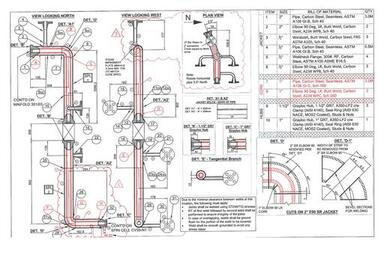

In [6]:

avg4=0 #initialising variable to store and calculate average accuracy

#Loop for iterating through image files in the path
for filepath in glob.iglob("/content/gdrive/MyDrive/CA-3/IsometricFiles/type4/*.jpg"):

    imagename=filepath.rsplit("/",1)[1] #obtaining the file name with extension from the filepath by Right-Split
    imgnoext=filepath.rsplit("c",1)[1] #obtaining the file number and extension from the filepath by Right-Split
    imgno=imgnoext.rsplit("-",1)[0] #obtaining the file number  from the 'file number and extension' by Right-Split

    print("Scanned image-",filepath) #printing the image details being processed for clarity

 #Reading the image file from  path       
    img = cv2.imread(filepath)

 #Pre-processing   
    img = img[180:img.shape[0]-2900,5610:img.shape[1]-230] #extracting the ROI(region of interest) - SEGMENTATION
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting image to grey-scale - part of BINARIZATION
    img = cv2.GaussianBlur(img, (3,3), 0) #applying Gaussian Blur - BLURRING

#Storing Results
    cv2.imwrite('/content/gdrive/My Drive/CA-3/Processed/type4/'+imagename, img)  #saving the processed image to the path

    text = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA-3/Processed/type4/"+imagename), lang='eng')))) #reading and converting the processed image into a 
                                                                                                                                    #string  -TESSERACT

    with open("/content/gdrive/My Drive/CA-3/Processed/type4/RedactedIsometric"+imgno+"-1.txt", "w") as writefile: #opening a text file in a path in write mode (supports replace)
     writefile.write(re.sub(r"[$+,:;=?@\"~!\]]",'',text) + "\n") #writing the string into a text file after using regex to remove noise characters -REGEX

#Evaluating Accuracy
    text1 = open("/content/gdrive/MyDrive/CA-3/IsometricFiles/type4/GroundTruth-BOM"+imgno+".txt").read() #reading truth file
    text2 = open("/content/gdrive/My Drive/CA-3/Processed/type4/RedactedIsometric"+imgno+"-1.txt").read() #reading saved text
    m = SequenceMatcher(None, text1, text2) #comparing both file -SEQUENCE MATCHING

#Printing Results
    print("Accuracy - ")
    print(m.ratio()) #returns percentage of similarity
    avg4=avg4+m.ratio()*100 #calculating average accuracy of the subset
    print("\n"+"**********************************"+"\n")
avg4=avg4/12
print("Average=",avg4) #printing average accuracy of the subset#printing average accuracy of the subset

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type4/RedactedIsometric5-1.jpg
Accuracy - 
0.5989672977624785

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type4/RedactedIsometric6-1.jpg
Accuracy - 
0.43956043956043955

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type4/RedactedIsometric7-1.jpg
Accuracy - 
0.592507204610951

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type4/RedactedIsometric8-1.jpg
Accuracy - 
0.4281813216821409

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type4/RedactedIsometric9-1.jpg
Accuracy - 
0.4718435091879075

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/IsometricFiles/type4/RedactedIsometric10-1.jpg
Accuracy - 
0.5310344827586206

**********************************

Scanned image- /content/gdrive/MyDrive/CA-3/Isometr

#Average Accuracy for the entire set

In [8]:
(avg1+avg2+avg3+avg4)/4 #Average accuracy of the work

35.483885067350215